 Task 3: IPL winning team prediction

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
cricket_match=pd.read_csv("matches.csv")
deliveries=pd.read_csv("deliveries.csv")

In [3]:
cricket_match.head()

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,IPL-2017,Pune,06-04-2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,IPL-2017,Rajkot,07-04-2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,IPL-2017,Indore,08-04-2017,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,IPL-2017,Bangalore,08-04-2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [4]:
cricket_match.describe()

,id,dl_applied,win_by_runs,win_by_wickets
count,756.000000,756.000000,756.000000,756.000000
mean,1792.178571,0.025132,13.283069,3.350529
std,3464.478148,0.156630,23.471144,3.387963
min,1.000000,0.000000,0.000000,0.000000
25%,189.750000,0.000000,0.000000,0.000000
50%,378.500000,0.000000,0.000000,4.000000
75%,567.250000,0.000000,19.000000,6.000000
max,11415.000000,1.000000,146.000000,10.000000


In [5]:
cricket_match.shape

(756, 18)

In [6]:
cricket_match.isnull().sum()

id                   0
Season               0
city                 7
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               4
win_by_runs          0
win_by_wickets       0
player_of_match      4
venue                0
umpire1              2
umpire2              2
umpire3            637
dtype: int64

In [7]:
cricket_match.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               756 non-null    int64 
 1   Season           756 non-null    object
 2   city             749 non-null    object
 3   date             756 non-null    object
 4   team1            756 non-null    object
 5   team2            756 non-null    object
 6   toss_winner      756 non-null    object
 7   toss_decision    756 non-null    object
 8   result           756 non-null    object
 9   dl_applied       756 non-null    int64 
 10  winner           752 non-null    object
 11  win_by_runs      756 non-null    int64 
 12  win_by_wickets   756 non-null    int64 
 13  player_of_match  752 non-null    object
 14  venue            756 non-null    object
 15  umpire1          754 non-null    object
 16  umpire2          754 non-null    object
 17  umpire3          119 non-null    ob

In [8]:
deliveries.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


In [9]:
deliveries.shape
deliveries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179078 entries, 0 to 179077
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   match_id          179078 non-null  int64 
 1   inning            179078 non-null  int64 
 2   batting_team      179078 non-null  object
 3   bowling_team      179078 non-null  object
 4   over              179078 non-null  int64 
 5   ball              179078 non-null  int64 
 6   batsman           179078 non-null  object
 7   non_striker       179078 non-null  object
 8   bowler            179078 non-null  object
 9   is_super_over     179078 non-null  int64 
 10  wide_runs         179078 non-null  int64 
 11  bye_runs          179078 non-null  int64 
 12  legbye_runs       179078 non-null  int64 
 13  noball_runs       179078 non-null  int64 
 14  penalty_runs      179078 non-null  int64 
 15  batsman_runs      179078 non-null  int64 
 16  extra_runs        179078 non-null  int

In [10]:
cricket_match.dtypes

id                  int64
Season             object
city               object
date               object
team1              object
team2              object
toss_winner        object
toss_decision      object
result             object
dl_applied          int64
winner             object
win_by_runs         int64
win_by_wickets      int64
player_of_match    object
venue              object
umpire1            object
umpire2            object
umpire3            object
dtype: object

In [11]:
deliveries.dtypes

match_id             int64
inning               int64
batting_team        object
bowling_team        object
over                 int64
ball                 int64
batsman             object
non_striker         object
bowler              object
is_super_over        int64
wide_runs            int64
bye_runs             int64
legbye_runs          int64
noball_runs          int64
penalty_runs         int64
batsman_runs         int64
extra_runs           int64
total_runs           int64
player_dismissed    object
dismissal_kind      object
fielder             object
dtype: object

<function matplotlib.pyplot.show(close=None, block=None)>

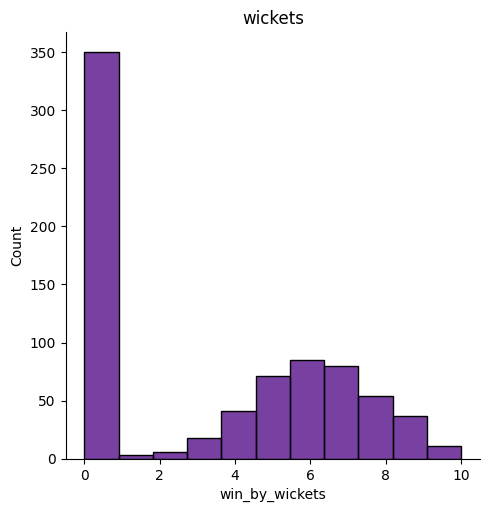

In [12]:
sns.displot(cricket_match["win_by_wickets"],color="indigo")
plt.title("wickets")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

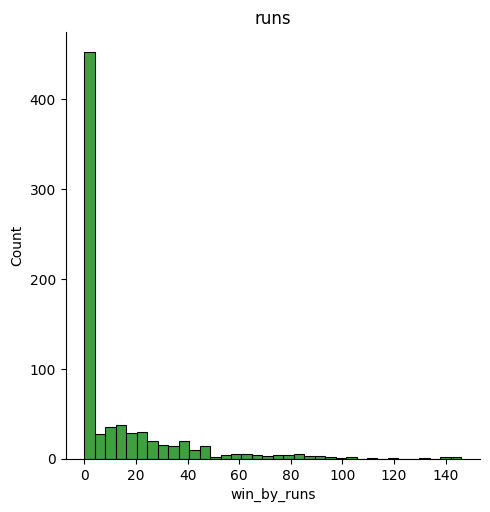

In [13]:
sns.displot(cricket_match["win_by_runs"],color="green",kde=False)
plt.title("runs")
plt.show

In [14]:
total_score_df = deliveries.groupby(['match_id','inning']).sum()['total_runs'].reset_index()

In [15]:
total_score_df = total_score_df[total_score_df['inning'] == 1]

In [16]:
total_score_df

,match_id,inning,total_runs
0,1,1,207
2,2,1,184
4,3,1,183
6,4,1,163
8,5,1,157
...,...,...,...
1518,11347,1,143
1520,11412,1,136
1522,11413,1,171
1524,11414,1,155


In [17]:
cricket_match.columns

Index(['id', 'Season', 'city', 'date', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'result', 'dl_applied', 'winner', 'win_by_runs',
       'win_by_wickets', 'player_of_match', 'venue', 'umpire1', 'umpire2',
       'umpire3'],
      dtype='object')

In [18]:
deliveries.columns

Index(['match_id', 'inning', 'batting_team', 'bowling_team', 'over', 'ball',
       'batsman', 'non_striker', 'bowler', 'is_super_over', 'wide_runs',
       'bye_runs', 'legbye_runs', 'noball_runs', 'penalty_runs',
       'batsman_runs', 'extra_runs', 'total_runs', 'player_dismissed',
       'dismissal_kind', 'fielder'],
      dtype='object')

In [19]:
cricket_match.team1

0              Sunrisers Hyderabad
1                   Mumbai Indians
2                    Gujarat Lions
3           Rising Pune Supergiant
4      Royal Challengers Bangalore
                  ...             
751          Kolkata Knight Riders
752            Chennai Super Kings
753            Sunrisers Hyderabad
754                 Delhi Capitals
755                 Mumbai Indians
Name: team1, Length: 756, dtype: object

In [20]:
cricket_match=cricket_match.merge(total_score_df[['match_id','total_runs']],left_on='id',right_on='match_id')

In [21]:
cricket_match

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3,match_id,total_runs
0,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN,1,207
1,2,IPL-2017,Pune,06-04-2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN,2,184
2,3,IPL-2017,Rajkot,07-04-2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN,3,183
3,4,IPL-2017,Indore,08-04-2017,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN,4,163
4,5,IPL-2017,Bangalore,08-04-2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN,5,157
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
751,11347,IPL-2019,Mumbai,05-05-2019,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,9,HH Pandya,Wankhede Stadium,Nanda Kishore,O Nandan,S Ravi,11347,143
752,11412,IPL-2019,Chennai,07-05-2019,Chennai Super Kings,Mumbai Indians,Chennai Super Kings,bat,normal,0,Mumbai Indians,0,6,AS Yadav,M. A. Chidambaram Stadium,Nigel Llong,Nitin Menon,Ian Gould,11412,136
753,11413,IPL-2019,Visakhapatnam,08-05-2019,Sunrisers Hyderabad,Delhi Capitals,Delhi Capitals,field,normal,0,Delhi Capitals,0,2,RR Pant,ACA-VDCA Stadium,NaN,NaN,NaN,11413,171
754,11414,IPL-2019,Visakhapatnam,10-05-2019,Delhi Capitals,Chennai Super Kings,Chennai Super Kings,field,normal,0,Chennai Super Kings,0,6,F du Plessis,ACA-VDCA Stadium,Sundaram Ravi,Bruce Oxenford,Chettithody Shamshuddin,11414,155


In [22]:
cricket_match['team1'].unique()

array(['Sunrisers Hyderabad', 'Mumbai Indians', 'Gujarat Lions',
       'Rising Pune Supergiant', 'Royal Challengers Bangalore',
       'Kolkata Knight Riders', 'Delhi Daredevils', 'Kings XI Punjab',
       'Chennai Super Kings', 'Rajasthan Royals', 'Deccan Chargers',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Rising Pune Supergiants',
       'Delhi Capitals'], dtype=object)

In [23]:
teams=['Sunrisers Hyderabad',
    'Mumbai Indians',
    'Royal Challengers Bangalore',
    'Kolkata Knight Riders',
    'Kings XI Punjab',
    'Chennai Super Kings',
    'Rajasthan Royals',
    'Delhi Capitals']

In [24]:
cricket_match['team1'] = cricket_match['team1'].str.replace('Delhi Daredevils','Delhi Capitals')
cricket_match['team2'] = cricket_match['team2'].str.replace('Delhi Daredevils','Delhi Capitals')

cricket_match['team1'] = cricket_match['team1'].str.replace('Deccan Chargers','Sunrisers Hyderabad')
cricket_match['team2'] = cricket_match['team2'].str.replace('Deccan Chargers','Sunrisers Hyderabad')

In [25]:
cricket_match = cricket_match[cricket_match['team1'].isin(teams)]
cricket_match= cricket_match[cricket_match['team2'].isin(teams)]

In [26]:
cricket_match.shape

(641, 20)

In [27]:
cricket_match = cricket_match[cricket_match['dl_applied'] == 0]

In [28]:
cricket_match= cricket_match[['match_id','city','winner','total_runs']]

In [29]:
deliveries = cricket_match.merge(deliveries,on='match_id')

In [30]:
deliveries= deliveries[deliveries['inning'] == 2]

In [31]:
deliveries

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batsman,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs_y,player_dismissed,dismissal_kind,fielder
125,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,1,CH Gayle,...,0,0,0,0,1,0,1,NaN,NaN,NaN
126,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,2,Mandeep Singh,...,0,0,0,0,0,0,0,NaN,NaN,NaN
127,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,3,Mandeep Singh,...,0,0,0,0,0,0,0,NaN,NaN,NaN
128,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,4,Mandeep Singh,...,0,0,0,0,2,0,2,NaN,NaN,NaN
129,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,5,Mandeep Singh,...,0,0,0,0,4,0,4,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149573,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,2,RA Jadeja,...,0,0,0,0,1,0,1,NaN,NaN,NaN
149574,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,3,SR Watson,...,0,0,0,0,2,0,2,NaN,NaN,NaN
149575,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,4,SR Watson,...,0,0,0,0,1,0,1,SR Watson,run out,KH Pandya
149576,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,5,SN Thakur,...,0,0,0,0,2,0,2,NaN,NaN,NaN


In [32]:
deliveries['total_runs_y'] = pd.to_numeric(deliveries['total_runs_y'], errors='coerce')
deliveries['current_score'] = deliveries.groupby('match_id')['total_runs_y'].cumsum()

In [33]:
deliveries['runs_left'] = deliveries['total_runs_x'] - deliveries['current_score']

In [34]:
deliveries['balls_left'] = 126 - (deliveries['over']*6 + deliveries['ball'])

In [35]:
deliveries

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batsman,...,penalty_runs,batsman_runs,extra_runs,total_runs_y,player_dismissed,dismissal_kind,fielder,current_score,runs_left,balls_left
125,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,1,CH Gayle,...,0,1,0,1,NaN,NaN,NaN,1,206,119
126,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,2,Mandeep Singh,...,0,0,0,0,NaN,NaN,NaN,1,206,118
127,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,3,Mandeep Singh,...,0,0,0,0,NaN,NaN,NaN,1,206,117
128,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,4,Mandeep Singh,...,0,2,0,2,NaN,NaN,NaN,3,204,116
129,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,5,Mandeep Singh,...,0,4,0,4,NaN,NaN,NaN,7,200,115
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149573,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,2,RA Jadeja,...,0,1,0,1,NaN,NaN,NaN,152,0,4
149574,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,3,SR Watson,...,0,2,0,2,NaN,NaN,NaN,154,-2,3
149575,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,4,SR Watson,...,0,1,0,1,SR Watson,run out,KH Pandya,155,-3,2
149576,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,5,SN Thakur,...,0,2,0,2,NaN,NaN,NaN,157,-5,1


In [37]:

# Assuming 'deliveries' is your DataFrame

# Fill NaN values in 'player_dismissed' with '-1' to indicate missing values
deliveries['player_dismissed'] = deliveries['player_dismissed'].fillna("-1")

# Convert 'player_dismissed' to numeric dtype
deliveries['player_dismissed'] = pd.to_numeric(deliveries['player_dismissed'], errors='coerce')

# Check for non-finite values (NaN or inf)
non_finite_values = deliveries['player_dismissed'].isna() | ~np.isfinite(deliveries['player_dismissed'])

# Replacing non-finite values with '-1' to indicate missing values
deliveries.loc[non_finite_values, 'player_dismissed'] = -1

# Converting to integer type
deliveries['player_dismissed'] = deliveries['player_dismissed'].astype(int)

# Creating a new column 'wickets' using cumulative sum grouped by 'match_id'
deliveries['wickets'] = deliveries.groupby('match_id')['player_dismissed'].cumsum()

# Calculate remaining wickets for each match
deliveries['wickets'] = 10 - deliveries['wickets']
print(deliveries.head())

     match_id       city               winner  total_runs_x  inning  \
125         1  Hyderabad  Sunrisers Hyderabad           207       2   
126         1  Hyderabad  Sunrisers Hyderabad           207       2   
127         1  Hyderabad  Sunrisers Hyderabad           207       2   
128         1  Hyderabad  Sunrisers Hyderabad           207       2   
129         1  Hyderabad  Sunrisers Hyderabad           207       2   

                    batting_team         bowling_team  over  ball  \
125  Royal Challengers Bangalore  Sunrisers Hyderabad     1     1   
126  Royal Challengers Bangalore  Sunrisers Hyderabad     1     2   
127  Royal Challengers Bangalore  Sunrisers Hyderabad     1     3   
128  Royal Challengers Bangalore  Sunrisers Hyderabad     1     4   
129  Royal Challengers Bangalore  Sunrisers Hyderabad     1     5   

           batsman  ... batsman_runs extra_runs  total_runs_y  \
125       CH Gayle  ...            1          0             1   
126  Mandeep Singh  ...     

In [38]:
deliveries.head()

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batsman,...,batsman_runs,extra_runs,total_runs_y,player_dismissed,dismissal_kind,fielder,current_score,runs_left,balls_left,wickets
125,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,1,CH Gayle,...,1,0,1,-1,NaN,NaN,1,206,119,11
126,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,2,Mandeep Singh,...,0,0,0,-1,NaN,NaN,1,206,118,12
127,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,3,Mandeep Singh,...,0,0,0,-1,NaN,NaN,1,206,117,13
128,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,4,Mandeep Singh,...,2,0,2,-1,NaN,NaN,3,204,116,14
129,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,5,Mandeep Singh,...,4,0,4,-1,NaN,NaN,7,200,115,15


In [39]:
# crr = runs/overs
deliveries['crr'] = (deliveries['current_score']*6)/(120 - deliveries['balls_left'])

In [40]:
deliveries['rrr'] = (deliveries['runs_left']*6)/deliveries['balls_left']

In [41]:
def result(row):
    return 1 if row['batting_team'] == row['winner'] else 0

In [42]:
deliveries['result'] = deliveries.apply(result,axis=1)

In [43]:
final = deliveries[['batting_team','bowling_team','city','runs_left','balls_left','wickets','total_runs_x','crr','rrr','result']]

In [44]:
final = final.sample(final.shape[0])

In [45]:
final.sample()

,batting_team,bowling_team,city,runs_left,balls_left,wickets,total_runs_x,crr,rrr,result
68870,Kings XI Punjab,Deccan Chargers,Chandigarh,13,5,127,190,9.234783,15.6,1


In [46]:
final.dropna(inplace=True)

In [47]:
final = final[final['balls_left'] != 0]

In [48]:
X = final.iloc[:,:-1]
y = final.iloc[:,-1]
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1)

In [49]:
X_train

,batting_team,bowling_team,city,runs_left,balls_left,wickets,total_runs_x,crr,rrr
132069,Rajasthan Royals,Mumbai Indians,Mumbai,155,110,21,177,13.200000,8.454545
45180,Royal Challengers Bangalore,Rajasthan Royals,Jaipur,11,39,91,130,8.814815,1.692308
135860,Mumbai Indians,Delhi Capitals,Mumbai,180,91,39,219,8.068966,11.868132
4566,Mumbai Indians,Royal Challengers Bangalore,Mumbai,162,118,12,162,0.000000,8.237288
32298,Delhi Daredevils,Mumbai Indians,Centurion,88,66,64,165,8.555556,8.000000
...,...,...,...,...,...,...,...,...,...
128002,Kolkata Knight Riders,Royal Challengers Bangalore,Bengaluru,60,36,99,185,8.928571,10.000000
64780,Chennai Super Kings,Kings XI Punjab,Chennai,11,3,130,156,7.435897,22.000000
119992,Delhi Daredevils,Mumbai Indians,Visakhapatnam,101,36,95,206,7.500000,16.833333
136693,Kings XI Punjab,Kolkata Knight Riders,Kolkata,40,6,128,223,9.631579,40.000000


In [50]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

trf = ColumnTransformer([
    ('trf',OneHotEncoder(sparse=False,drop='first'),['batting_team','bowling_team','city'])
]
,remainder='passthrough')

In [51]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline

In [52]:
pipe = Pipeline(steps=[
    ('step1',trf),
    ('step2',LogisticRegression(solver='liblinear'))
])
pipe.fit(X_train,y_train)

C:\Users\91843\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Pipeline(steps=[('step1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('trf',
                                                  OneHotEncoder(drop='first',
                                                                sparse=False),
                                                  ['batting_team',
                                                   'bowling_team', 'city'])])),
                ('step2', LogisticRegression(solver='liblinear'))])

In [53]:
y_pred = pipe.predict(X_test)

In [54]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
# Assuming 'pipe' is your pipeline
print(pipe.steps)
[('impute_and_scale', MinMaxScaler()), ('logistic_regression', LogisticRegression())]
for step_name, step_process in pipe.steps:
    print(f"Step Name: {step_name}")
    print(f"Step Process: {step_process}")
    print()


[('step1', ColumnTransformer(remainder='passthrough',
                  transformers=[('trf',
                                 OneHotEncoder(drop='first', sparse=False),
                                 ['batting_team', 'bowling_team', 'city'])])), ('step2', LogisticRegression(solver='liblinear'))]
Step Name: step1
Step Process: ColumnTransformer(remainder='passthrough',
                  transformers=[('trf',
                                 OneHotEncoder(drop='first', sparse=False),
                                 ['batting_team', 'bowling_team', 'city'])])

Step Name: step2
Step Process: LogisticRegression(solver='liblinear')



In [55]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.7933281939869647

In [56]:
pipe.predict_proba(X_test)[10]

array([0.64779691, 0.35220309])

In [57]:
def match_summary(row):
    print("Batting Team-" + row['batting_team'] + " | Bowling Team-" + row['bowling_team'] + " | Target- " + str(row['total_runs_x']))
    

In [67]:
def match_progression(x,match_id,pipe):
    match = x[x['match_id'] == match_id]
    match = match[(match['ball'] == 6)]
    temp = match[['batting_team','bowling_team','city','runs_left','balls_left','wickets','total_runs_x','crr','rrr']].dropna()
    temp = temp[temp['balls_left'] != 0]
    result = pipe.predict_proba(temp)
    temp['lose'] = np.round(result.T[0]*100,1)
    temp['win'] = np.round(result.T[1]*100,1)
    temp['end_of_over'] = range(1,temp.shape[0]+1)
    
    target = temp['total_runs_x'].values[0]
    runs = list(temp['runs_left'].values)
    new_runs = runs[:]
    runs.insert(0,target)
    temp['runs_after_over'] = np.array(runs)[:-1] - np.array(new_runs)
    wickets = list(temp['wickets'].values)
    new_wickets = wickets[:]
    new_wickets.insert(0,10)
    wickets.append(0)
    w = np.array(wickets)
    nw = np.array(new_wickets)
    temp['wickets_in_over'] = (nw - w)[0:temp.shape[0]]
    
    print("Target-",target)
    temp = temp[['end_of_over','runs_after_over','wickets_in_over','lose','win']]
    return temp,target
    

In [68]:
temp,target = match_progression(deliveries,74,pipe)
temp

Target- 178


,end_of_over,runs_after_over,wickets_in_over,lose,win
10459,1,4,-6,62.9,37.1
10467,2,8,-8,62.4,37.6
10473,3,1,-6,74.8,25.2
10479,4,7,-6,75.5,24.5
10485,5,12,-6,68.0,32.0
10491,6,13,-6,57.8,42.2
10497,7,9,-6,55.4,44.6
10505,8,15,-8,42.5,57.5
10511,9,7,-6,44.3,55.7
10518,10,17,-7,27.8,72.2


Text(0.5, 1.0, 'Target-178')

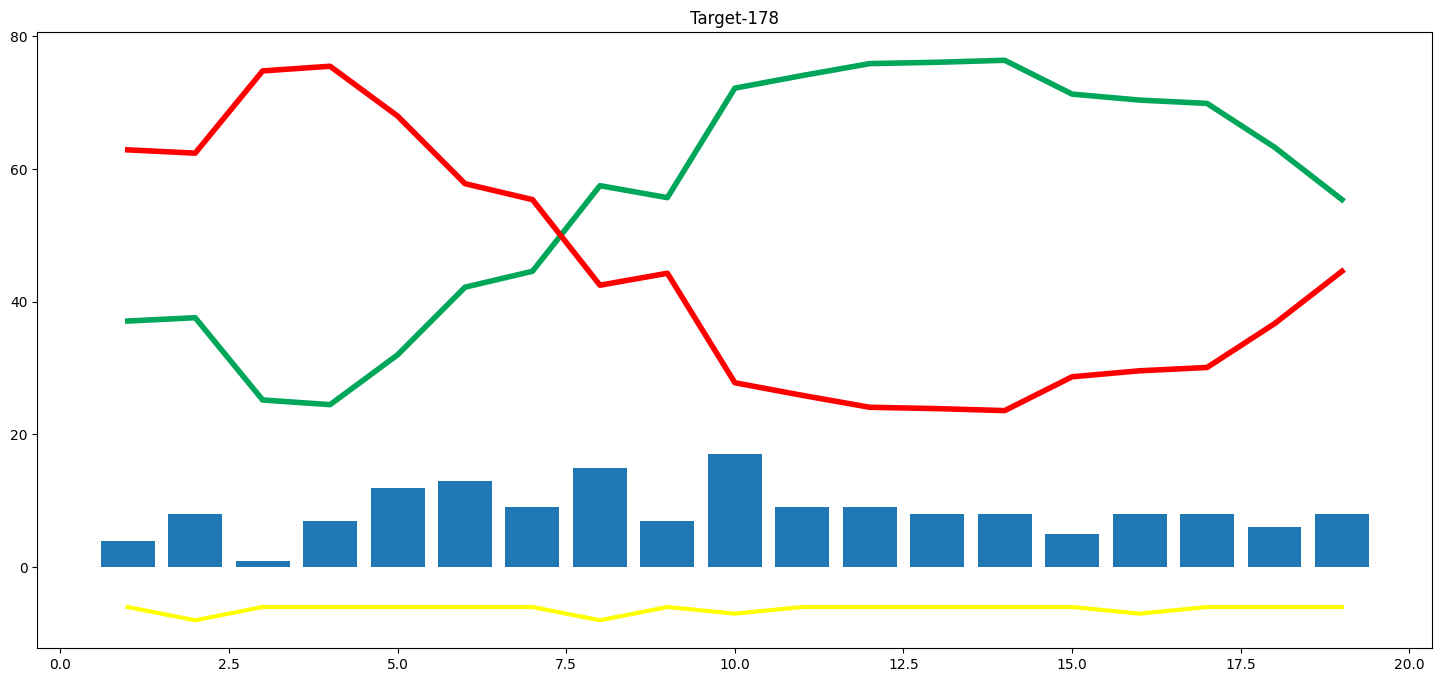

In [69]:
import matplotlib.pyplot as plt
plt.figure(figsize=(18,8))
plt.plot(temp['end_of_over'],temp['wickets_in_over'],color='yellow',linewidth=3)
plt.plot(temp['end_of_over'],temp['win'],color='#00a65a',linewidth=4)
plt.plot(temp['end_of_over'],temp['lose'],color='red',linewidth=4)
plt.bar(temp['end_of_over'],temp['runs_after_over'])
plt.title('Target-' + str(target))

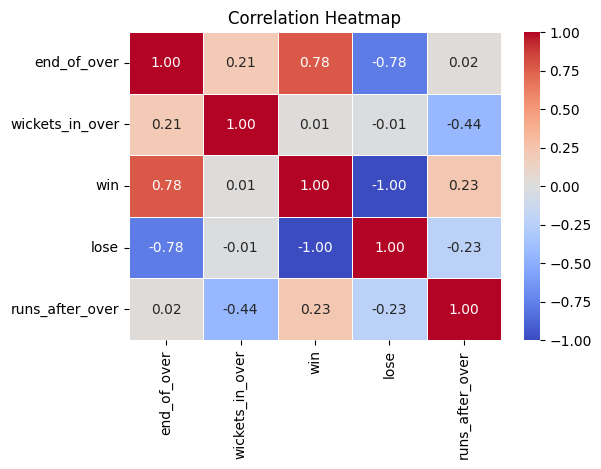

In [61]:
import seaborn as sns
import matplotlib.pyplot as plt
heatmap_data = temp[['end_of_over', 'wickets_in_over', 'win', 'lose', 'runs_after_over']]
correlation_matrix = heatmap_data.corr()
plt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()


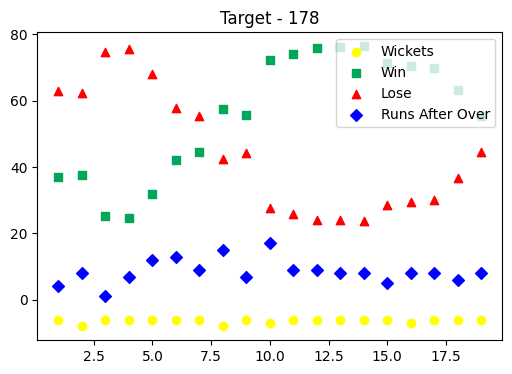

In [62]:
plt.figure(figsize=(6, 4))
plt.scatter(temp['end_of_over'], temp['wickets_in_over'], color='yellow', label='Wickets', marker='o')
plt.scatter(temp['end_of_over'], temp['win'], color='#00a65a', label='Win', marker='s')
plt.scatter(temp['end_of_over'], temp['lose'], color='red', label='Lose', marker='^')
plt.scatter(temp['end_of_over'], temp['runs_after_over'], color='blue', label='Runs After Over', marker='D')
plt.title('Target - ' + str(target))
plt.legend()
plt.show()

In [63]:
teams

['Sunrisers Hyderabad',
 'Mumbai Indians',
 'Royal Challengers Bangalore',
 'Kolkata Knight Riders',
 'Kings XI Punjab',
 'Chennai Super Kings',
 'Rajasthan Royals',
 'Delhi Capitals']

In [64]:
deliveries['city'].unique()

array(['Hyderabad', 'Bangalore', 'Mumbai', 'Indore', 'Kolkata', 'Delhi',
       'Chandigarh', 'Jaipur', 'Chennai', 'Cape Town', 'Port Elizabeth',
       'Durban', 'Centurion', 'East London', 'Johannesburg', 'Kimberley',
       'Bloemfontein', 'Ahmedabad', 'Cuttack', 'Nagpur', 'Dharamsala',
       'Visakhapatnam', 'Pune', 'Raipur', 'Ranchi', 'Abu Dhabi',
       'Sharjah', nan, 'Mohali', 'Bengaluru'], dtype=object)

In [65]:
import pickle
pickle.dump(pipe,open('pipe.pkl','wb'))